Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
# cell for imports. All imports must go here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import missingno as msno

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [ ]:
uploaded = files.upload()


df = pd.read_csv('train.csv')

print("Dataset Information:")
print(df.info())

print("\nFirst 5 rows of the dataset:")
df.head()

Saving train.csv to train (1).csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

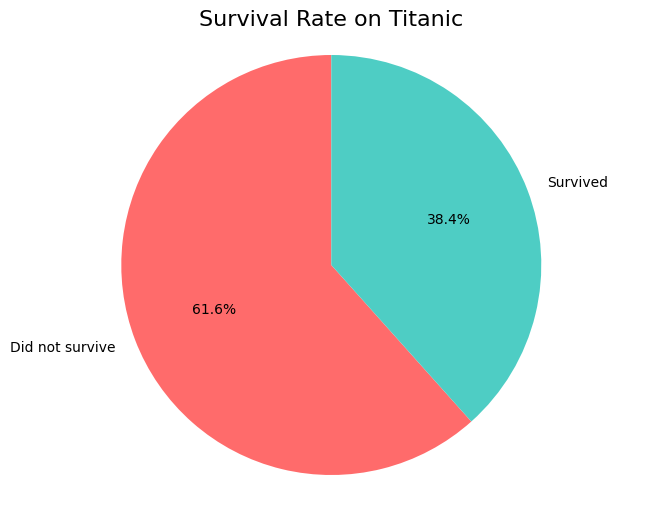

In [ ]:
survival_counts = df['Survived'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Did not survive', 'Survived'],
        autopct='%1.1f%%', startangle=90, colors=['#FF6B6B', '#4ECDC4'])
plt.title('Survival Rate on Titanic', fontsize=16)
plt.axis('equal')
plt.show()



*прокоментуйте отримані візуалізації

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


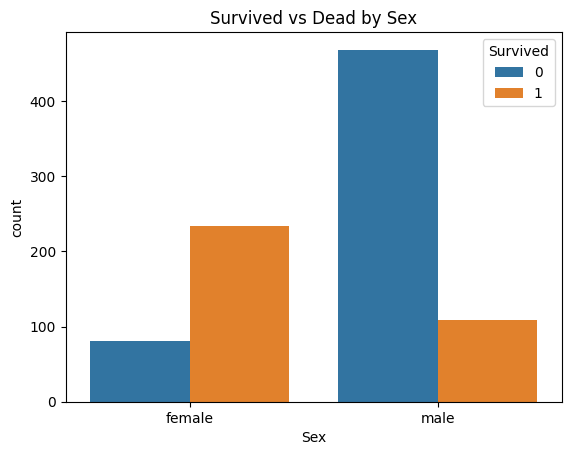

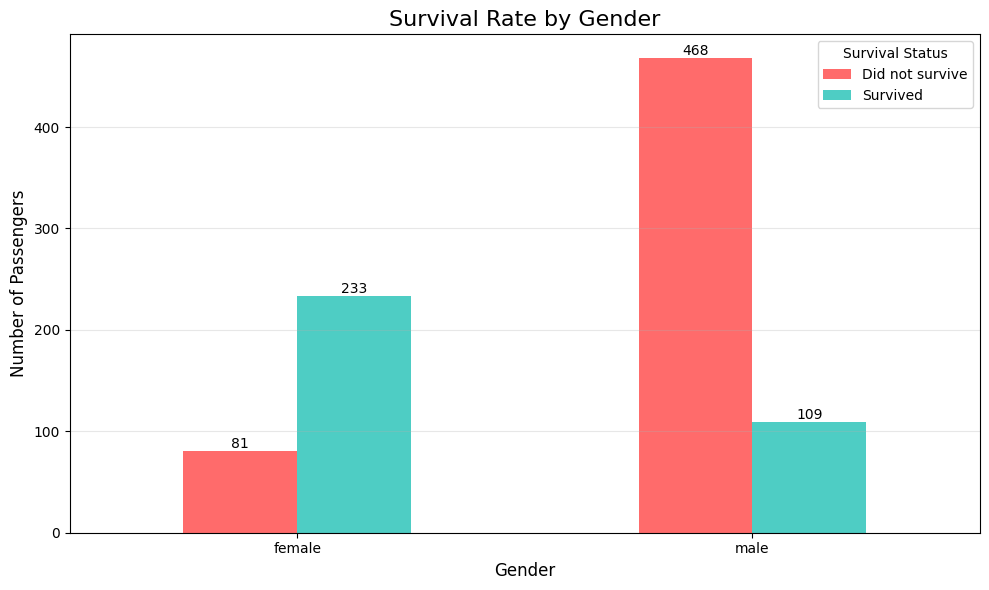

Commentary on Gender and Survival:
The visualization clearly shows a significant gender disparity in survival rates.


In [ ]:
gender_survival = df.groupby(['Sex', 'Survived'], as_index=False).size()

gender_survival_pivot = gender_survival.pivot(index='Sex', columns='Survived', values='size')
gender_survival_pivot.columns = ['Did not survive', 'Survived']

plt.figure(figsize=(10, 6))
gender_survival_pivot.plot(kind='bar', stacked=False, color=['#FF6B6B', '#4ECDC4'], ax=plt.gca())
plt.title('Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Survival Status')
plt.grid(axis='y', alpha=0.3)

for i, container in enumerate(plt.gca().containers):
    plt.gca().bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

print("Commentary on Gender and Survival:")
print("The visualization clearly shows a significant gender disparity in survival rates.")


*прокоментуйте отримані візуалізації

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

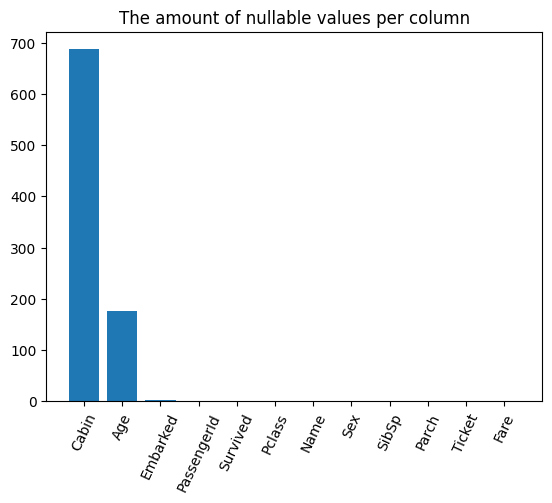

<ipython-input-14-8e8cfd504856>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='coolwarm')


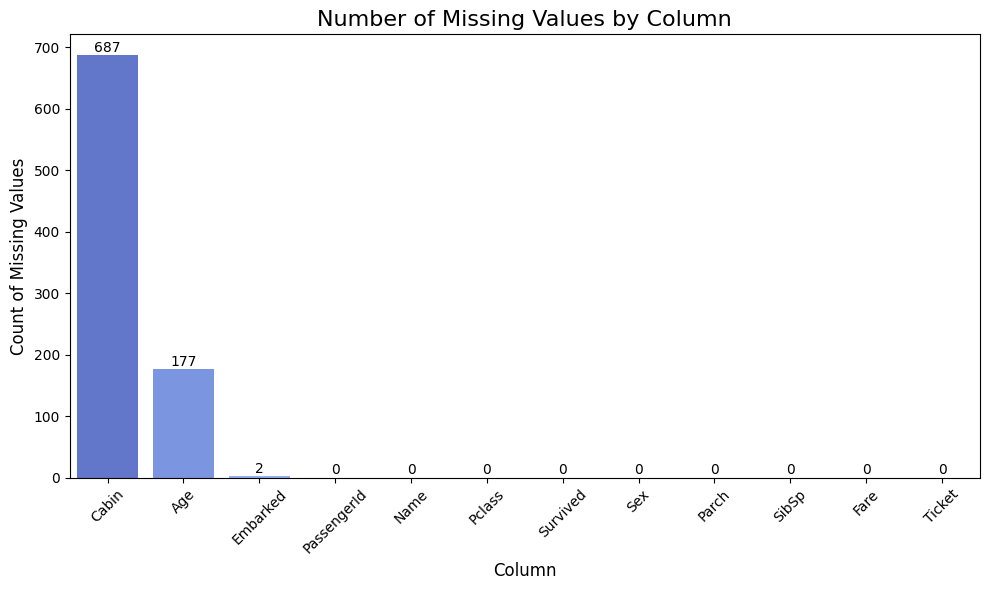

Commentary on Missing Values:
The visualizations reveal that certain variables in dataset have significant missing values:


In [ ]:

missing_values = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='coolwarm')
plt.title('Number of Missing Values by Column', fontsize=16)
plt.xlabel('Column', fontsize=12)
plt.ylabel('Count of Missing Values', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(missing_values.values):
    plt.text(i, v+5, f"{v}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

print("Commentary on Missing Values:")
print("The visualizations reveal that certain variables in dataset have significant missing values:")

*прокоментуйте отримані візуалізації

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

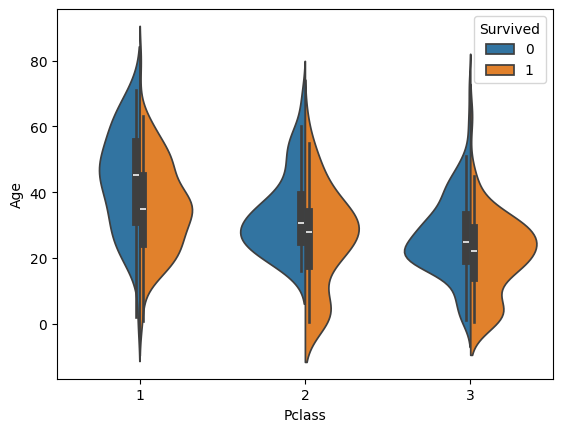

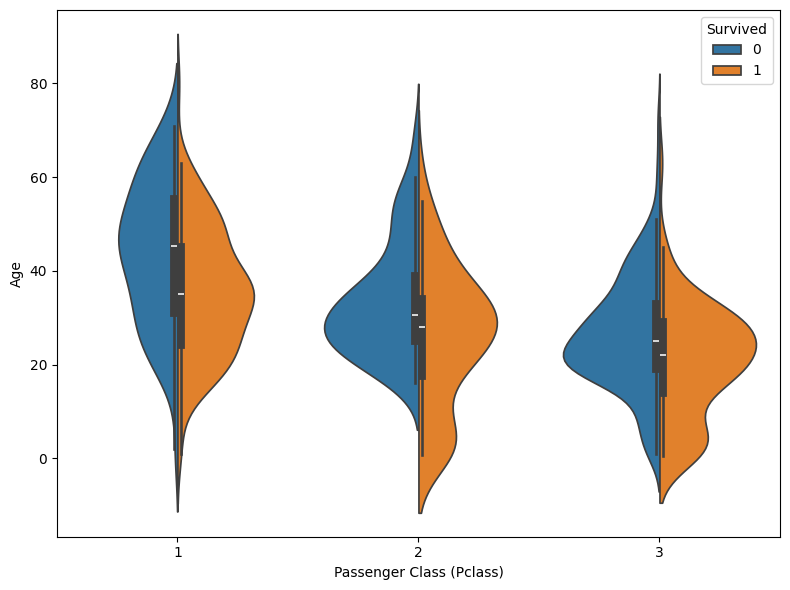

In [ ]:
plot_df = df.dropna(subset=['Age'])

plt.figure(figsize=(8, 6))
sns.violinplot(
    data=plot_df,
    x='Pclass',
    y='Age',
    hue='Survived',
    split=True,

)
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

*прокоментуйте отримані візуалізації

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


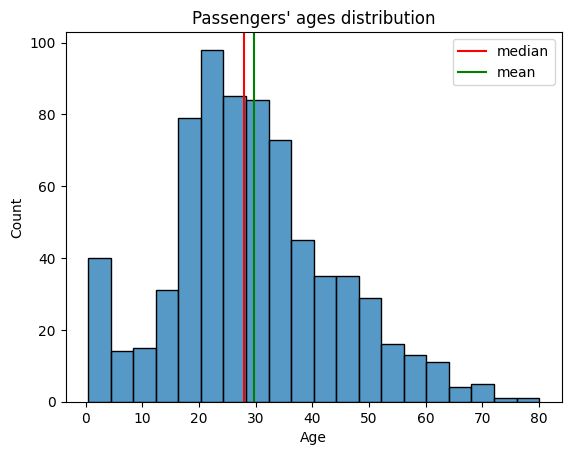

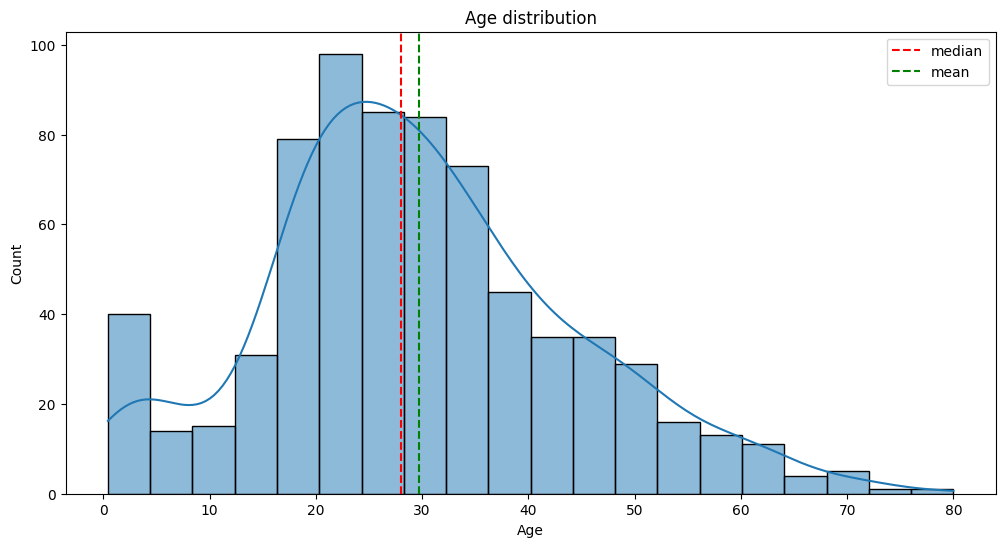

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].median(), color='r', linestyle='--', label='median')
plt.axvline(df['Age'].mean(), color='g', linestyle='--', label='mean')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


*прокоментуйте отримані візуалізації

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

How did the passenger class (Pclass) influence the survival rate on the Titanic, and did this relationship differ by age group?

Passenger class was a major determinant of survival during the Titanic disaster, overshadowing the role of age.

The provided graphs plot shows the age distribution of survivors and other useful information



*прокоментуйте отримані візуалізації

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

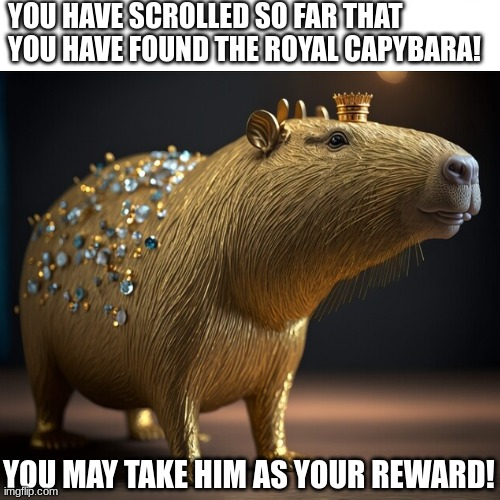